# Exploratory Data Analysis

## 1. Importing Libraries

In [36]:
# Libraries we will need for loading and preprocessing the data

import datetime
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from scipy import stats
from scipy.stats import skew, norm
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax


import sys
sys.path.append('../scripts/')
from VisualisationPlots import VisualiseDf as my_plot

import warnings
warnings.filterwarnings(action="ignore")

# to know which filepath to use to get to the source data
import os
for dirname, _, filenames in os.walk('../data/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

../data/AdSmartABdata.csv


In [37]:
# loading data

raw = pd.read_csv('../data/AdSmartABdata.csv', na_values=['?', None])
raw.head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0


In [38]:
# loading instance of plotter

In [39]:
raw.describe()

,hour,platform_os,yes,no
count,8077.000000,8077.000000,8077.000000,8077.000000
mean,11.615080,5.947134,0.070818,0.083075
std,5.734879,0.224333,0.256537,0.276013
min,0.000000,5.000000,0.000000,0.000000
25%,7.000000,6.000000,0.000000,0.000000
50%,13.000000,6.000000,0.000000,0.000000
75%,15.000000,6.000000,0.000000,0.000000
max,23.000000,7.000000,1.000000,1.000000


In [40]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8077 entries, 0 to 8076
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   auction_id   8077 non-null   object
 1   experiment   8077 non-null   object
 2   date         8077 non-null   object
 3   hour         8077 non-null   int64 
 4   device_make  8077 non-null   object
 5   platform_os  8077 non-null   int64 
 6   browser      8077 non-null   object
 7   yes          8077 non-null   int64 
 8   no           8077 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 568.0+ KB


In [ ]:
# we need to convert the columns[experiment, date] (so far) into numerical values

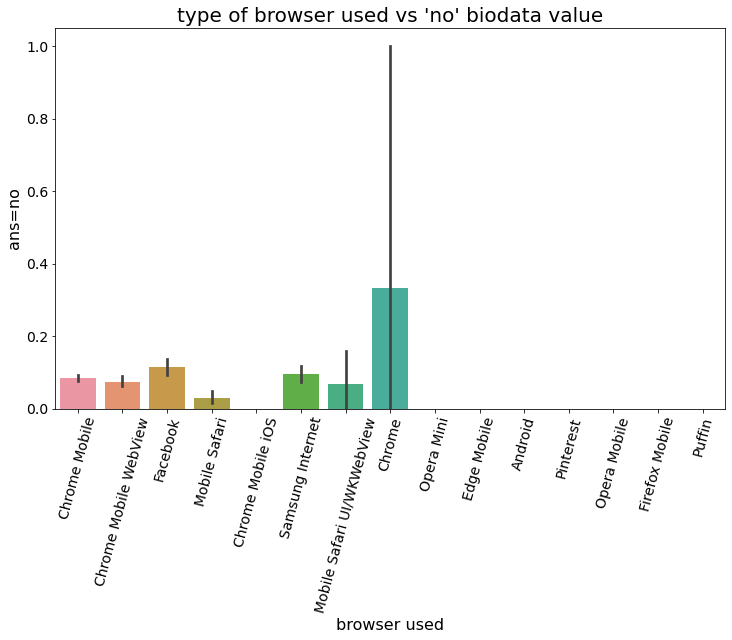

In [41]:
# plotting a bar graph on: type of browser used vs no bio data value

my_plot.plot_bar(my_plot, raw, 'browser', 'no', "type of browser used vs 'no' biodata value", "browser used", "ans=no")

(doesn't make sense. the value of no is binary. \
shouldn't have any values in between 0 and 1)
<br />
(?: what causes the output to show some browsers had output btn 0 and 1)

In [43]:
my_plot.plot_bar(my_plot, raw, 'experiment', 'date', "type of experiment vs date", "experiment_type", "date")

TypeError: Neither the `x` nor `y` variable appears to be numeric.

<Figure size 864x504 with 0 Axes>

## 2. Plotting histograms

In [42]:
# histogram on the hour column

my_plot.plot_hist(my_plot, raw, 'platform_os')

TypeError: distplot() got an unexpected keyword argument 'data'